# Data Mining Assignment

This assignment represents 100% of the Data Mining module’s mark. It is composed of Part 1 which is worth 40 marks, and Part 2 which is worth 60 marks. You can work in a team of 2 students for this assignment. One student per team will be chosen by the team as being the team leader – who will be in charge of coordinating the team’s work, and of submitting the assignment in their account on VLE on behalf of all the team.

# PART 1:

This task is based on the Sonar real data seen previously in class. Several objects which can be rock or metal cylinders are scanned on different angles and under different conditions, with sonar signals. 60 measurements are recorded per columns for each object (one record per object) and these are the predictors called A1, A2, …, A60. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is metal cylinder, and this is the outcome variable called Class.

Two datasets are provided to you: a training dataset in the sonar_train.csv file, and a test dataset in the sonar_test.csv file.

a) You are required to write a Python code implementing the simplest Nearest Neighbour algorithm (that is, using just 1 neighbour), with the Minkowski distance, both discussed in lecture of week 1. Your code will read the power q appearing in the Mionkowski distance, and will classify each record from the test dataset based on the training dataset. Remember, to classify a record from the test set you need to find its nearest neighbour in the training set (this is the one which minimizes the distance to the test set record); take the class of the nearest neighbour as the predicted class for the test set record. After classifying all the records in the test set, your code needs to calculate and display the accuracy, recall, precision, and F1 measure with respect to the class "M" (which is assumed to be the positive class), of the predictions on the test dataset. Run your code to produce results first for Manhattan distance and then for Euclidian distance, which are particular cases of Minkowski distance (q=1, and q=2, see lecture week 1).

b) Run your code for the power q as a positive integer number from 1 to 20 and display the accuracy, recall, precision, and F1 measure on the test set in a chart. Which value of q leads to the best accuracy on the test set?

The code, comments, explanations and results will be provided in a Jupyter notebook called Part1.

Note that in this task you are not to apply a library for the nearest neighbour algorithm, but you are required to compute the distances, find the nearest neighbour, and so code yourself this simple algorithm.

# Code Explained

This code performs the nearest neighbor algorithm with the Minkowski distance on a sonar dataset, where the goal is to predict whether an object detected by sonar is a rock or a mine (i.e., whether the outcome variable is "M" or "R").

First, The code imports necessary packages, and reads in the training and test datasets from CSV files using Pandas and extracts the predictor variables and outcome variable from them. The outcome variable is converted to binary integers, where "M" is mapped to 1 and "R" is mapped to 0.

A function to calculate the Minkowski distance between two points and another function to predict the outcome variable for a test record using the nearest neighbor algorithm have been implemented into the code. The latter function calculates the Minkowski distance between the test record and each training record, sorts them by distance, and selects the outcome variable of the nearest training record as the prediction. A function to evaluate the performance of the model using accuracy, recall, precision, and F1 score is defined. These values are calculated based on the confusion matrix generated by Scikit-learn's confusion_matrix function.

The code defines a list of values of p to test and trains the model for each value of p using the training set and evaluates its performance on the test set using the evaluate_performance function. The accuracy, recall, precision, and F1 score for each value of p are stored in lists.

Finally, the code plots the results of the evaluation using Matplotlib, with p on the x-axis and accuracy, recall, precision, and F1 score on the y-axis. The p value with the highest accuracy on the test set is printed out.

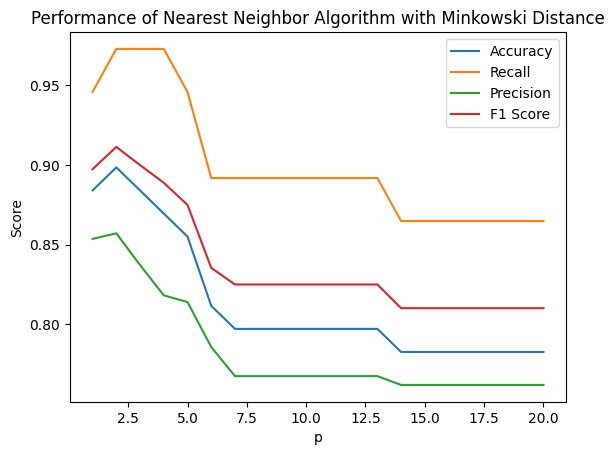

The value of p that leads to the highest accuracy on the test set is 2.


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Read in the datasets
train_data = pd.read_csv("sonar_train.csv")
test_data = pd.read_csv("sonar_test.csv")

# Extract the predictor variables and outcome variable from the datasets
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Convert outcome variable values to binary integers
y_train = np.where(y_train == "M", 1, 0)
y_test = np.where(y_test == "M", 1, 0)

# Function to calculate the Minkowski distance between two points
def minkowski_distance(x1, x2, p):
    return np.sum(np.abs(x1 - x2) ** p) ** (1/p)

# Function to predict the outcome variable for a test record using the nearest neighbor algorithm
def predict_class(X_train, y_train, x_test, p):
    distances = []
    for i in range(len(X_train)):
        distance = minkowski_distance(X_train[i], x_test, p)
        distances.append((distance, y_train[i]))
    distances.sort()
    return distances[0][1]

# Function to calculate the accuracy, recall, precision, and F1 score for a set of predictions
def evaluate_performance(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * precision * recall / (precision + recall)
    return accuracy, recall, precision, f1

# List of values of p to test
p_values = list(range(1, 21))

# Train the model for each value of p and evaluate its performance on the test set
accuracies = []
recalls = []
precisions = []
f1_scores = []
for p in p_values:
    y_pred = [predict_class(X_train, y_train, x_test, p) for x_test in X_test]
    accuracy, recall, precision, f1 = evaluate_performance(y_test, y_pred)
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

# Plot the results
plt.plot(p_values, accuracies, label="Accuracy")
plt.plot(p_values, recalls, label="Recall")
plt.plot(p_values, precisions, label="Precision")
plt.plot(p_values, f1_scores, label="F1 Score")
plt.legend()
plt.xlabel("p")
plt.ylabel("Score")
plt.title("Performance of Nearest Neighbor Algorithm with Minkowski Distance")
plt.show()

# Print the p value with the highest accuracy on the test set
best_p = p_values[np.argmax(accuracies)]
print(f"The value of p that leads to the highest accuracy on the test set is {best_p}.")